In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.colors as pc
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D 
from IPython.display import HTML
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pymysql
import streamlit as st


In [3]:
df = pd.read_csv('CC GENERAL.csv')

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

C:\Users\Ayoub\AppData\Local\Temp\ipykernel_20036\2401561398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)
C:\Users\Ayoub\AppData\Local\Temp\ipykernel_20036\2401561398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [16]:
df['PAYMENT_RATIO'] = df['PAYMENTS'] / df['BALANCE']
df['UTILIZATION_RATE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['AVG_PURCHASE_VALUE'] = df['PURCHASES'] / df['PURCHASES_TRX']
df['PAYMENT_TO_MIN_PAYMENT'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['PURCHASES_TIMES_FREQUENCY'] = df['PURCHASES'] * df['PURCHASES_FREQUENCY']

In [18]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,AVG_PURCHASE_VALUE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,4.933946,0.040901,47.700000,1.446508,15.900032
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,1.281210,0.457495,NaN,3.826241,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.249310,0.332687,64.430833,0.991682,773.170000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,0.000000,0.222223,1499.000000,0.000000,124.916167
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,0.829550,0.681429,16.000000,2.771075,1.333328


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [22]:
df = df.drop(columns=['AVG_PURCHASE_VALUE'])

In [24]:
df['PAYMENT_RATIO'].fillna(df['PAYMENT_RATIO'].median(), inplace=True)

C:\Users\Ayoub\AppData\Local\Temp\ipykernel_20036\856983674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PAYMENT_RATIO'].fillna(df['PAYMENT_RATIO'].median(), inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
features = df.drop(columns=['CUST_ID'])

In [30]:
features.drop_duplicates()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,4.933946,0.040901,1.446508,15.900032
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,1.281210,0.457495,3.826241,0.000000
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,0.249310,0.332687,0.991682,773.170000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,12,0.000000,0.222223,0.000000,124.916167
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,0.829550,0.681429,2.771075,1.333328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,325.594462,48.886365,0.500000,6,11.426966,0.028494,6.660231,291.120000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,275.861322,312.343947,0.000000,6,14.380349,0.019183,0.883197,300.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5,1000.0,81.270775,82.418369,0.250000,6,3.473307,0.023399,0.986076,120.333285
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,500.0,52.549959,55.755628,0.250000,6,3.904864,0.026915,0.942505,0.000000


In [33]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [35]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Remove rows that fall outside the lower and upper bound of the IQR
features = features[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
outliers = ((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.sum()

0

In [39]:
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.0,12,4.933946,0.040901,1.446508,15.900032
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.0,12,0.829550,0.681429,2.771075,1.333328
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,...,12,2300.0,679.065082,532.033990,0.0,12,0.372365,0.792892,1.276357,436.200000
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,...,5,7000.0,688.278568,311.963409,0.0,12,0.678156,0.144989,2.206280,287.163046
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,...,0,3000.0,805.647974,989.962866,0.0,12,0.290557,0.924258,0.813816,0.000000


In [41]:
scale = StandardScaler()
features_scaled = scale.fit_transform(features)

In [43]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
0,-1.163368,-2.764648,-0.633097,-0.603100,-0.308484,-0.641699,-0.597985,-0.668567,-0.574972,-0.799681,...,-0.635107,-0.899759,-0.885829,-0.968652,-0.395904,0.0,1.236628,-1.325202,-0.382935,-0.641750
1,-0.401627,0.322286,-0.814919,-0.554568,-0.686274,-0.641699,-0.822841,-0.185586,-0.799175,-0.799681,...,-0.748828,-0.817010,-0.178017,-0.662105,-0.395904,0.0,-0.347903,0.521035,0.163897,-0.682981
2,0.584794,0.322286,0.147315,-0.603100,1.041105,-0.641699,1.650553,-0.668567,1.891273,-0.799681,...,0.502101,-0.361888,-0.176932,0.174258,-0.395904,0.0,-0.524402,0.842315,-0.453180,0.547890
3,-0.208241,0.322286,1.121204,1.403371,0.105738,-0.641699,-0.148279,-0.185586,-0.126563,-0.799681,...,-0.293945,1.582725,-0.163247,-0.466520,-0.395904,0.0,-0.406350,-1.025180,-0.069272,0.126048
4,1.515499,0.322286,-0.851558,-0.603100,-0.686274,-0.105518,-1.047694,-0.668567,-0.799175,-0.148515,...,-0.862549,-0.072264,0.011086,1.507607,-0.395904,0.0,-0.555985,1.220957,-0.644134,-0.686755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,-0.803980,0.322286,-0.851558,-0.603100,-0.686274,1.467563,-1.047694,-0.668567,-0.799175,0.502660,...,-0.862549,-0.692886,-1.039276,-0.709184,-0.395904,0.0,-0.574822,-0.660243,-0.802251,-0.686755
2903,-0.241229,0.322286,2.285663,3.552465,-0.686274,-0.641699,-0.822841,-0.185586,-0.799175,-0.799681,...,-0.748828,-0.734260,-0.299294,-0.059985,-0.395904,0.0,-0.433409,0.577212,-0.434619,-0.363612
2904,-1.118138,0.322286,0.535048,-0.603100,1.711622,-0.641699,1.650553,-0.668567,1.667070,-0.799681,...,0.502101,-0.692886,-0.425619,-0.865279,-0.395904,0.0,1.601524,-1.275866,0.226795,1.027143
2905,-1.137405,0.322286,-0.176025,-0.603100,0.481944,-0.641699,0.301430,-0.668567,0.321846,-0.799681,...,-0.180224,-0.899759,-0.820642,-0.888242,4.211898,0.0,0.739591,-1.248887,-0.373201,-0.269262


In [45]:
features_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2907 non-null   float64
 1   BALANCE_FREQUENCY                 2907 non-null   float64
 2   PURCHASES                         2907 non-null   float64
 3   ONEOFF_PURCHASES                  2907 non-null   float64
 4   INSTALLMENTS_PURCHASES            2907 non-null   float64
 5   CASH_ADVANCE                      2907 non-null   float64
 6   PURCHASES_FREQUENCY               2907 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2907 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2907 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2907 non-null   float64
 10  CASH_ADVANCE_TRX                  2907 non-null   float64
 11  PURCHASES_TRX                     2907 non-null   float64
 12  CREDIT

In [47]:
qt_normal = QuantileTransformer(n_quantiles = 100, output_distribution = 'normal')
qt_normal_col = ['PAYMENT_TO_MIN_PAYMENT', 'MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES', 'PURCHASES_TIMES_FREQUENCY', 'PURCHASES','UTILIZATION_RATE', 'INSTALLMENTS_PURCHASES', 'PAYMENTS', 'CASH_ADVANCE_TRX','CASH_ADVANCE','PURCHASES_TRX','TENURE']                 
for feature in qt_normal_col:
    features_scaled_df[feature] = qt_normal.fit_transform(features_scaled_df[[feature]])

In [49]:
skewness = features_scaled_df.skew(numeric_only=True)
skewness

BALANCE                             1.144836
BALANCE_FREQUENCY                  -3.237398
PURCHASES                          -0.775475
ONEOFF_PURCHASES                    0.158151
INSTALLMENTS_PURCHASES              0.063439
CASH_ADVANCE                       -0.014881
PURCHASES_FREQUENCY                 0.459119
ONEOFF_PURCHASES_FREQUENCY          1.725308
PURCHASES_INSTALLMENTS_FREQUENCY    0.838651
CASH_ADVANCE_FREQUENCY              1.164850
CASH_ADVANCE_TRX                    0.070587
PURCHASES_TRX                      -0.762602
CREDIT_LIMIT                        1.457078
PAYMENTS                           -1.136405
MINIMUM_PAYMENTS                    0.017495
PRC_FULL_PAYMENT                    2.924337
TENURE                              0.000000
PAYMENT_RATIO                       2.729338
UTILIZATION_RATE                   -0.036534
PAYMENT_TO_MIN_PAYMENT             -1.133758
PURCHASES_TIMES_FREQUENCY          -0.775607
dtype: float64

<Axes: title={'center': 'Correlation of Features'}>

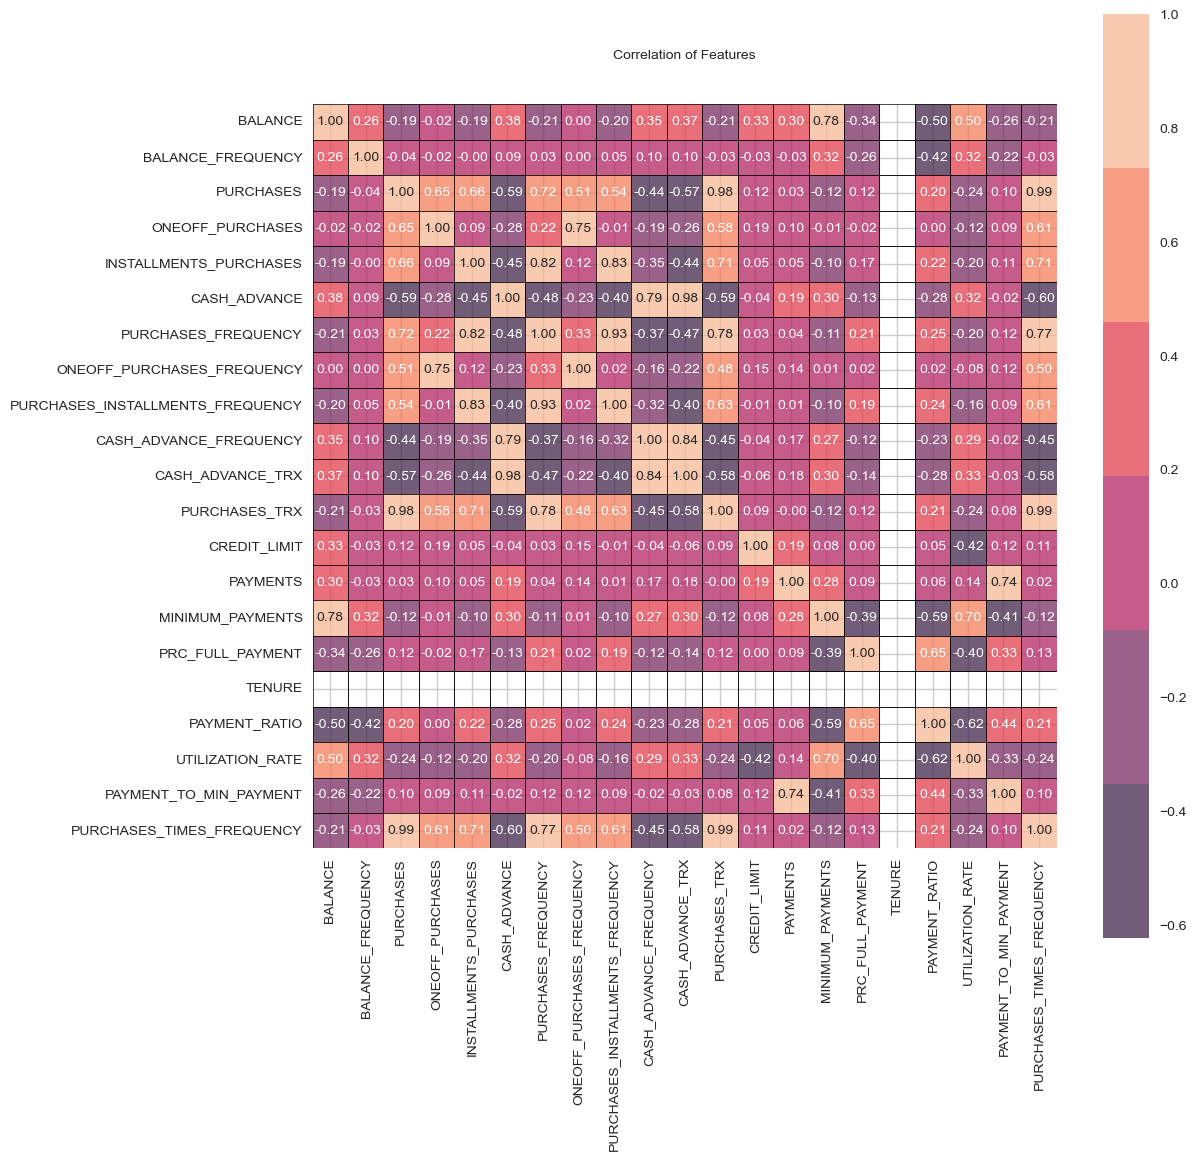

In [51]:
plt.figure(figsize=(12, 12))
plt.title('Correlation of Features', y = 1.05, size = 10)
sns.heatmap(features_scaled_df.corr(), square = True, linewidths=0.5, linecolor='black', 
            cmap = sns.color_palette(palette='rocket'), annot = True, annot_kws = {"size": 10}, alpha = 0.7, fmt = '.2f')

In [53]:
features_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2907 non-null   float64
 1   BALANCE_FREQUENCY                 2907 non-null   float64
 2   PURCHASES                         2907 non-null   float64
 3   ONEOFF_PURCHASES                  2907 non-null   float64
 4   INSTALLMENTS_PURCHASES            2907 non-null   float64
 5   CASH_ADVANCE                      2907 non-null   float64
 6   PURCHASES_FREQUENCY               2907 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2907 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2907 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2907 non-null   float64
 10  CASH_ADVANCE_TRX                  2907 non-null   float64
 11  PURCHASES_TRX                     2907 non-null   float64
 12  CREDIT

In [55]:
features_scaled_df_end = features_scaled_df.drop(columns = ['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_RATIO'])

In [57]:
features_scaled_df_end.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
0,-1.163368,-0.313658,-5.199338,0.216832,-5.199338,-0.597985,-0.668567,-0.574972,-0.799681,-5.199338,-0.282216,-0.899759,-1.287706,-1.579554,-1.231686,0.097211,-0.302587
1,-0.401627,-0.550690,0.083706,-5.199338,-5.199338,-0.822841,-0.185586,-0.799175,-0.799681,-5.199338,-0.444660,-0.817010,0.178563,-0.430804,0.282777,0.585171,-0.550731
2,0.584794,0.431343,-5.199338,1.024861,-5.199338,1.650553,-0.668567,1.891273,-0.799681,-5.199338,0.698526,-0.361888,0.179913,0.458760,0.480757,-0.025968,0.807443
3,-0.208241,1.072155,1.206518,0.469511,-5.199338,-0.148279,-0.185586,-0.126563,-0.799681,-5.199338,0.037988,1.582725,0.197440,-0.147935,-0.704451,0.432307,0.533588
4,1.515499,-5.199338,-5.199338,-5.199338,0.464044,-1.047694,-0.668567,-0.799175,-0.148515,0.126937,-5.199338,-0.072264,0.403821,1.266593,1.071433,-0.751579,-5.199338


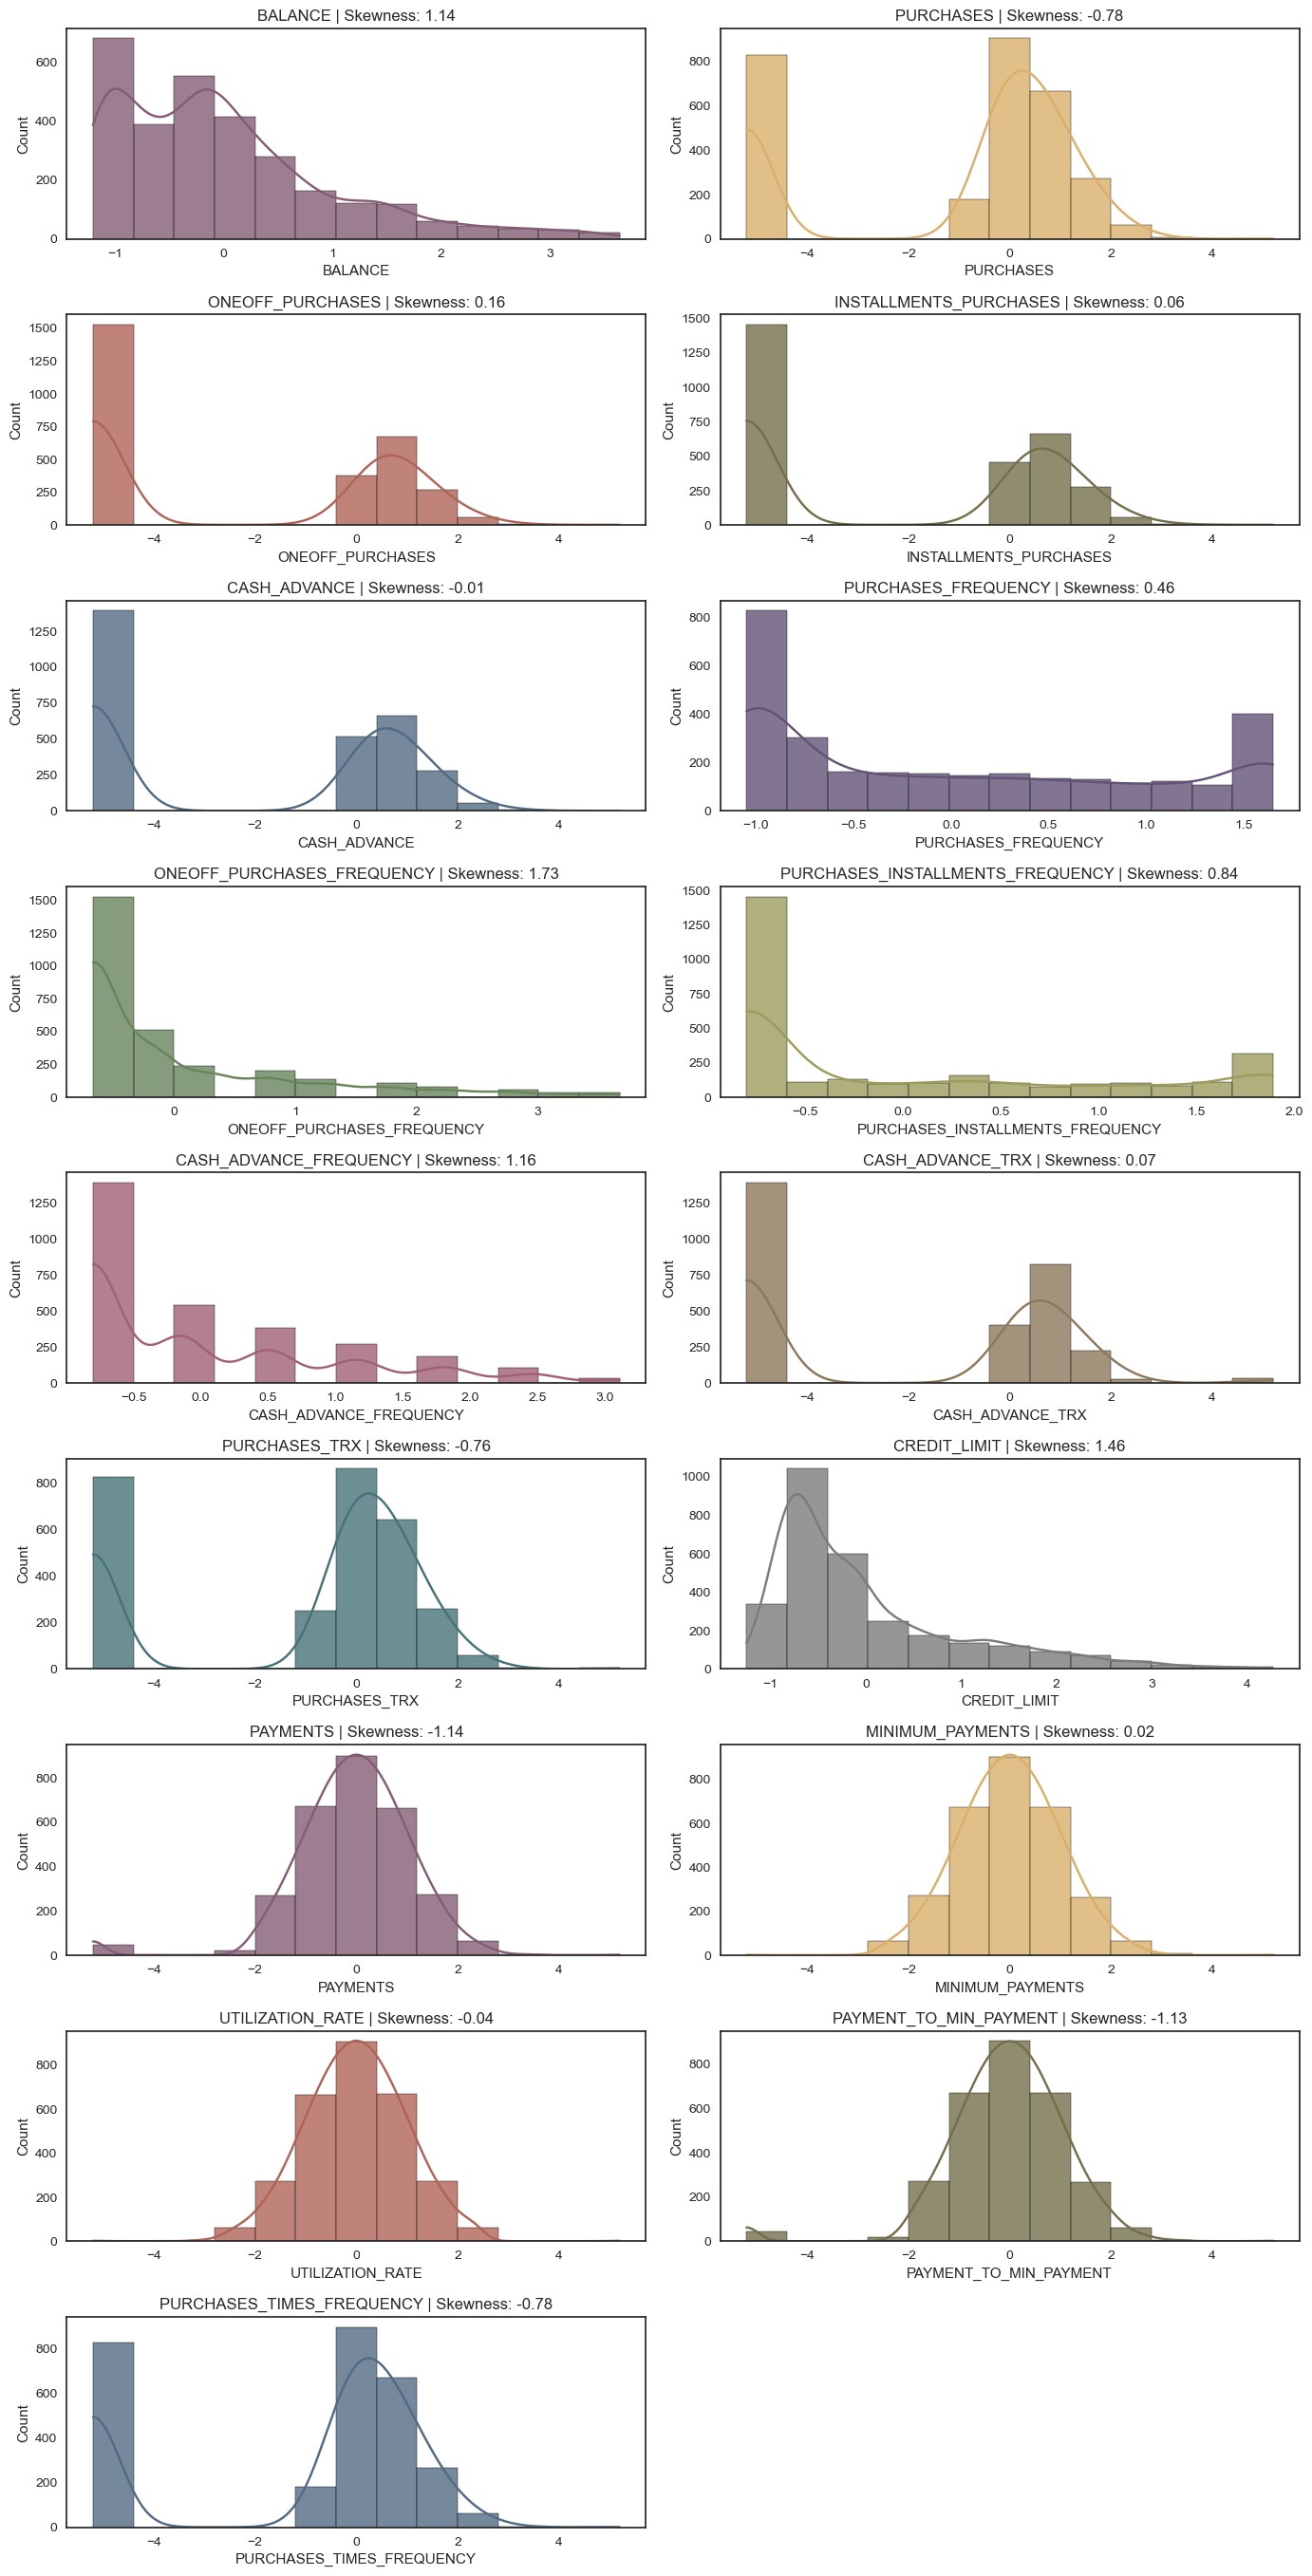

In [59]:
num_columns = features_scaled_df_end.select_dtypes(include=['int64', 'float64']).columns
antique_palette = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', '#625377FF', '#68855CFF', '#9C9C5EFF', 
                   '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']
sns.set_style('white')
plt.figure(figsize=(14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 2, idx)
    color_idx = (idx - 1) % len(antique_palette)
    sns.histplot(features_scaled_df_end[feature], bins = 'sturges', kde = True, color = antique_palette[color_idx], alpha = 0.8, 
                     edgecolor = 'black')
    plt.title(f"{feature} | Skewness: {round(features_scaled_df_end[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation of Features'}>

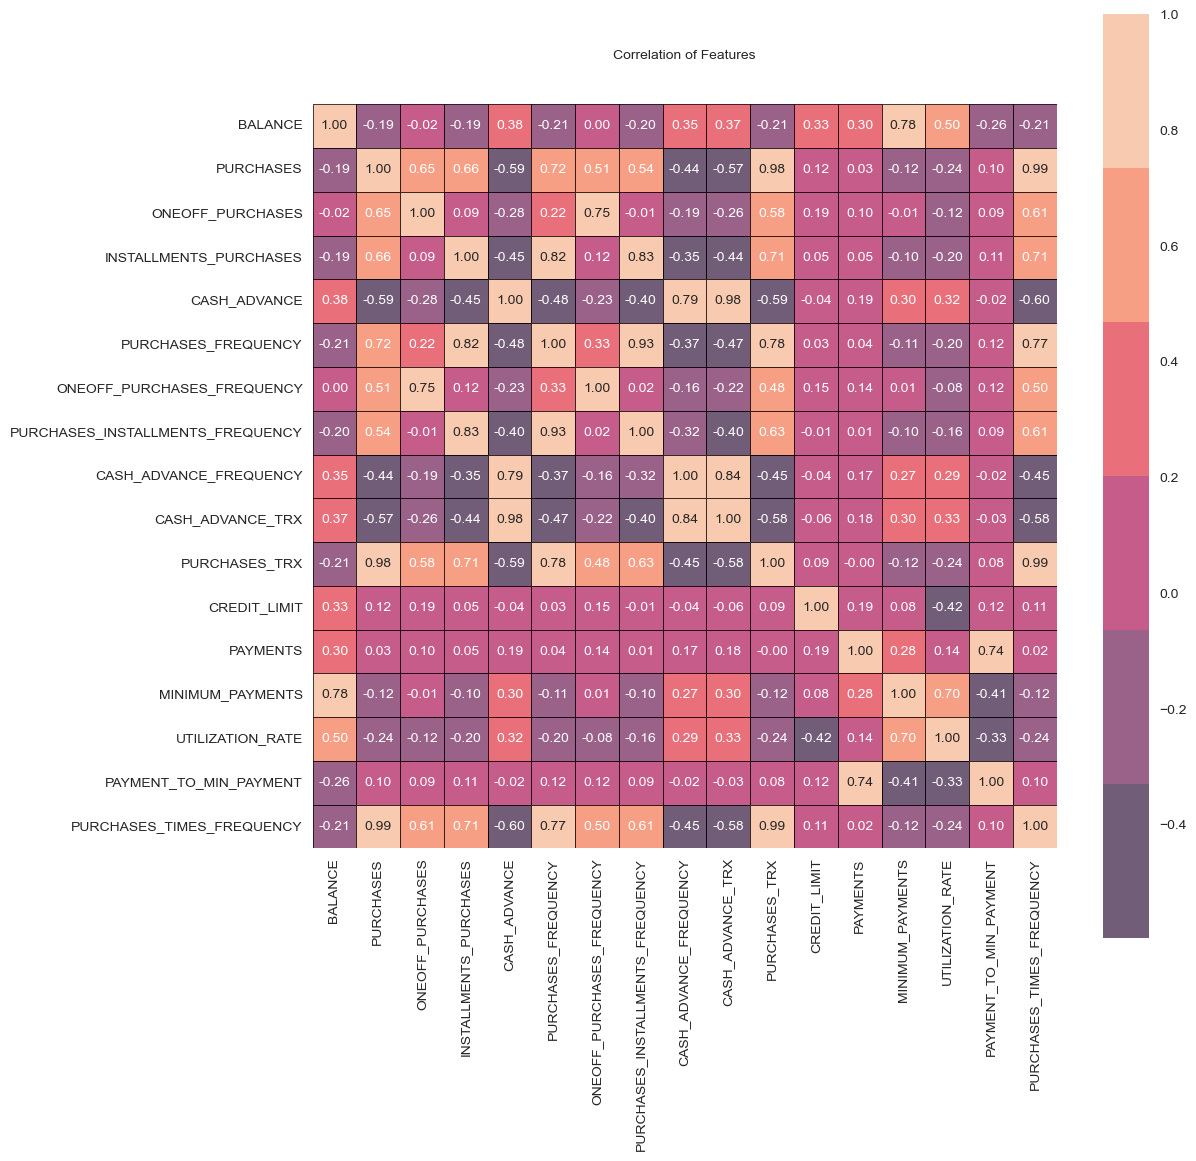

In [61]:
plt.figure(figsize=(12, 12))
plt.title('Correlation of Features', y = 1.05, size = 10)
sns.heatmap(features_scaled_df_end.corr(), square = True, linewidths=0.5, linecolor='black', 
            cmap = sns.color_palette(palette='rocket'), annot = True, annot_kws = {"size": 10}, alpha = 0.7, fmt = '.2f')

### CLUSTERING

In [63]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(features_scaled_df_end)

Best eps: 1.9000000000000008, Best min_samples: 10, Silhouette Score: 0.746


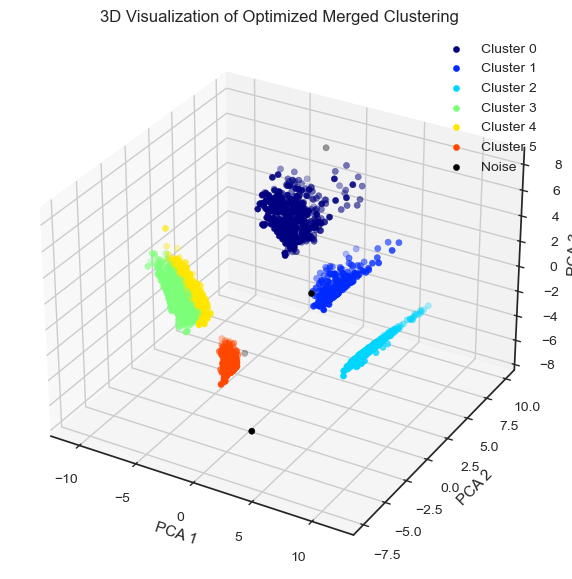

In [65]:
eps_range = np.arange(1.0, 2.0, 0.1)  # Adjust range as needed
min_samples_range = range(10, 25, 2)  # Adjust range as needed

best_score = -1  # Initialize best score
best_eps, best_min_samples = None, None
best_final_labels = None  # To store labels of the best model

for eps in eps_range:
    for min_samples in min_samples_range:
        # DBSCAN Clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_pca)
        
        # Calculate silhouette score only if there are multiple clusters
        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(data_pca, dbscan_labels)
            
            # Update best parameters if current score is higher
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps, best_min_samples = eps, min_samples
                
                # Merge clusters and store final labels
                cluster_centroids = []
                for label in set(dbscan_labels):
                    if label != -1:
                        cluster_points = data_pca[dbscan_labels == label]
                        centroid = cluster_points.mean(axis=0)
                        cluster_centroids.append(centroid)

                cluster_centroids = np.array(cluster_centroids)
                n_clusters = max(len(cluster_centroids) - 1, 1)
                
                hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
                hierarchical_labels = hierarchical.fit_predict(cluster_centroids)
                
                merged_labels = {}
                for i, dbscan_label in enumerate(set(dbscan_labels) - {-1}):
                    merged_labels[dbscan_label] = hierarchical_labels[i]

                best_final_labels = [merged_labels[label] if label in merged_labels else -1 for label in dbscan_labels]

# Print best parameters and silhouette score
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Silhouette Score: {best_score:.3f}")

# Visualization for best parameters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(best_final_labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]
    ax.scatter(data_pca[np.array(best_final_labels) == label, 0], 
               data_pca[np.array(best_final_labels) == label, 1], 
               data_pca[np.array(best_final_labels) == label, 2], 
               c=[color], label=f'Cluster {label}' if label != -1 else 'Noise')

ax.set_title('3D Visualization of Optimized Merged Clustering')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.show()

In [67]:
db_score = davies_bouldin_score(data_pca, best_final_labels)


In [69]:
db_score

1.684106070777942

In [71]:
ch_score = calinski_harabasz_score(data_pca, best_final_labels)

In [73]:
ch_score

8578.419945941798

In [75]:
features['cluster_label'] = best_final_labels

In [77]:
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY,cluster_label
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.0,12,4.933946,0.040901,1.446508,15.900032,3
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.0,12,0.829550,0.681429,2.771075,1.333328,5
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,...,2300.0,679.065082,532.033990,0.0,12,0.372365,0.792892,1.276357,436.200000,3
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,...,7000.0,688.278568,311.963409,0.0,12,0.678156,0.144989,2.206280,287.163046,4
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,...,3000.0,805.647974,989.962866,0.0,12,0.290557,0.924258,0.813816,0.000000,2


In [79]:
features_df = features[features['cluster_label'] != -1]

In [81]:
features_df.groupby('cluster_label').count()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,422,422,422,422,422,422,422,422,422,422,...,422,422,422,422,422,422,422,422,422,422
1,268,268,268,268,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268
2,824,824,824,824,824,824,824,824,824,824,...,824,824,824,824,824,824,824,824,824,824
3,534,534,534,534,534,534,534,534,534,534,...,534,534,534,534,534,534,534,534,534,534
4,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
5,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359


In [83]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2903 entries, 0 to 8760
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2903 non-null   float64
 1   BALANCE_FREQUENCY                 2903 non-null   float64
 2   PURCHASES                         2903 non-null   float64
 3   ONEOFF_PURCHASES                  2903 non-null   float64
 4   INSTALLMENTS_PURCHASES            2903 non-null   float64
 5   CASH_ADVANCE                      2903 non-null   float64
 6   PURCHASES_FREQUENCY               2903 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2903 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2903 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2903 non-null   float64
 10  CASH_ADVANCE_TRX                  2903 non-null   int64  
 11  PURCHASES_TRX                     2903 non-null   int64  
 12  CREDIT_LIMI

In [85]:
features_df['Cust_Id'] = df['CUST_ID']

C:\Users\Ayoub\AppData\Local\Temp\ipykernel_20036\1704091278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['Cust_Id'] = df['CUST_ID']


In [87]:
features_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY,cluster_label,Cust_Id
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.0,12,4.933946,0.040901,1.446508,15.900032,3,C10001
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.0,12,0.829550,0.681429,2.771075,1.333328,5,C10005
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,...,679.065082,532.033990,0.0,12,0.372365,0.792892,1.276357,436.200000,3,C10008
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,...,688.278568,311.963409,0.0,12,0.678156,0.144989,2.206280,287.163046,4,C10009
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,...,805.647974,989.962866,0.0,12,0.290557,0.924258,0.813816,0.000000,2,C10015


In [89]:
features_df.drop(columns = ['TENURE'])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY,cluster_label,Cust_Id
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.0,4.933946,0.040901,1.446508,15.900032,3,C10001
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.0,0.829550,0.681429,2.771075,1.333328,5,C10005
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,2300.0,679.065082,532.033990,0.0,0.372365,0.792892,1.276357,436.200000,3,C10008
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,7000.0,688.278568,311.963409,0.0,0.678156,0.144989,2.206280,287.163046,4,C10009
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,...,3000.0,805.647974,989.962866,0.0,0.290557,0.924258,0.813816,0.000000,2,C10015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,407.399529,1.000000,0.00,0.00,0.00,1364.307564,0.000000,0.000000,0.000000,0.166667,...,1500.0,98.494145,228.622281,0.0,0.241763,0.271600,0.430816,0.000000,2,C18971
8738,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1400.0,596.685481,451.584847,0.0,0.608065,0.700919,1.321314,114.166210,5,C18976
8742,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,...,1500.0,511.637312,175.012705,0.0,5.879131,0.058017,2.923430,605.520000,3,C18980
8759,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,...,1000.0,245.689379,167.126034,0.3,3.646474,0.067377,1.470084,147.500000,3,C18998


In [91]:
db_params = {
    'host': 'localhost',       # Change if your MySQL server is on another host
    'user': 'root',   # Replace with your MySQL username
    'password': 'Ayoubstat@123', # Replace with your MySQL password
    'database': 'bank_costumer' # Your database name
}

In [93]:
connection = pymysql.connect(**db_params)
cursor = connection.cursor()

In [95]:
cluster_names = {
    0: 'Frequent Shoppers',
    1: 'Budget Savers',
    2: 'Inactive Users',
    3: 'High-Risk Borrowers',
    4: 'High Spender',
    5: 'Middle-Class Users'
}

# Add a new column with the descriptive cluster names
features_df['cluster_name'] = features_df['cluster_label'].map(cluster_names)


C:\Users\Ayoub\AppData\Local\Temp\ipykernel_20036\2603800561.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['cluster_name'] = features_df['cluster_label'].map(cluster_names)


In [553]:
cluster_labels = features_df['cluster_label'].unique()  # Get unique cluster labels
cluster_data = [(label,) for label in cluster_labels]  # Make it a list of tuples

# Insert data into 'customer' table
customer_data = features_df[['Cust_Id', 'cluster_label']].values.tolist()

# Insert data into 'balance' table
balance_data = features_df[['Cust_Id', 'BALANCE', 'CREDIT_LIMIT', 'UTILIZATION_RATE']].values.tolist()

# Insert data into 'purchases_payments' table
purchases_data = features_df[['Cust_Id', 'PURCHASES', 'ONEOFF_PURCHASES', 
                               'INSTALLMENTS_PURCHASES', 'PAYMENTS', 
                               'MINIMUM_PAYMENTS', 'PAYMENT_RATIO']].values.tolist()

# Insert data into database
with connection.cursor() as cursor:
    # Insert unique cluster IDs into 'cluster' table
    cursor.executemany("INSERT IGNORE INTO cluster (cluster_id) VALUES (%s)", cluster_data)
    
    # Insert data into 'customer' table using INSERT IGNORE
    cursor.executemany("""
        INSERT IGNORE INTO customer (cust_id, TENURE, cluster_id)
        VALUES (%s, %s, %s)
    """, customer_data)

    # Insert data into 'balance' table
    cursor.executemany("""
        INSERT INTO balance (cust_id, balance, credit_limit, utilization_rate)
        VALUES (%s, %s, %s, %s)
    """, balance_data)

    # Insert data into 'purchases_payments' table
    cursor.executemany("""
        INSERT INTO purchases (cust_id, purchases, oneoff_purchases, 
                                        installments_purchases, payments, 
                                        minimum_payments, payment_ratio)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, purchases_data)

# Commit the transaction to save changes in the database
connection.commit()

In [536]:
print(features_df.groupby('cluster_label')['ONEOFF_PURCHASES_FREQUENCY'].mean())

cluster_label
0    0.151659
1    0.197139
2    0.000000
3    0.000000
4    0.267977
5    0.236769
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64


In [538]:
cluster_names = {
    0: 'Frequent Shoppers',
    1: 'Budget Savers',
    2: 'Inactive Users',
    3: 'High-Risk Borrowers',
    4: 'High Spender',
    5: 'Middle-Class Users'
}

# Add a new column with the descriptive cluster names
features_df['cluster_name'] = features_df['cluster_label'].map(cluster_names)


C:\Users\Ayoub\AppData\Local\Temp\ipykernel_12620\3939384090.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['cluster_name'] = features_df['cluster_label'].map(cluster_names)


In [97]:
features_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_RATIO,UTILIZATION_RATE,PAYMENT_TO_MIN_PAYMENT,PURCHASES_TIMES_FREQUENCY,cluster_label,Cust_Id,cluster_name
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.0,12,4.933946,0.040901,1.446508,15.900032,3,C10001,High-Risk Borrowers
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.0,12,0.829550,0.681429,2.771075,1.333328,5,C10005,Middle-Class Users
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,...,532.033990,0.0,12,0.372365,0.792892,1.276357,436.200000,3,C10008,High-Risk Borrowers
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,...,311.963409,0.0,12,0.678156,0.144989,2.206280,287.163046,4,C10009,High Spender
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,...,989.962866,0.0,12,0.290557,0.924258,0.813816,0.000000,2,C10015,Inactive Users


In [107]:
customer_df = features_df[['Cust_Id', 'cluster_label']]
cluster_df = features_df[['cluster_label', 'cluster_name']].drop_duplicates()
balance_df = features_df[['Cust_Id', 'BALANCE', 'BALANCE_FREQUENCY', 'CREDIT_LIMIT', 'UTILIZATION_RATE']]
purchases_df = features_df[['Cust_Id', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                             'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                             'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX', 
                             'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
                             'PAYMENT_RATIO', 'PAYMENT_TO_MIN_PAYMENT', 
                             'PURCHASES_TIMES_FREQUENCY']]


In [111]:
cluster_df.head()

,cluster_label,cluster_name
0,3,High-Risk Borrowers
4,5,Middle-Class Users
8,4,High Spender
14,2,Inactive Users
26,1,Budget Savers


In [113]:
with connection.cursor() as cursor:
    for index, row in cluster_df.iterrows():
        cursor.execute("""
            INSERT INTO cluster (cluster_id, cluster_name)
            VALUES (%s, %s)
        """, (row['cluster_label'], row['cluster_name']))

# Insert into customer table
with connection.cursor() as cursor:
    for index, row in customer_df.iterrows():
        cursor.execute("""
            INSERT INTO customer (cust_id, cluster_id)
            VALUES (%s, %s)
        """, (row['Cust_Id'], row['cluster_label']))  # Ensure 'cluster_id' is in features_df

# Insert into balance table
with connection.cursor() as cursor:
    for index, row in balance_df.iterrows():
        cursor.execute("""
            INSERT INTO balance (cust_id, BALANCE, BALANCE_FREQUENCY, CREDIT_LIMIT, UTILIZATION_RATE)
            VALUES (%s, %s, %s, %s, %s)
        """, (row['Cust_Id'], row['BALANCE'], row['BALANCE_FREQUENCY'], row['CREDIT_LIMIT'], row['UTILIZATION_RATE']))

# Insert into purchases table
with connection.cursor() as cursor:
    for index, row in purchases_df.iterrows():
        cursor.execute("""
            INSERT INTO purchases (cust_id, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES,
                                   PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY,
                                   PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX, PAYMENTS,
                                   MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, PAYMENT_RATIO,
                                   PAYMENT_TO_MIN_PAYMENT, PURCHASES_TIMES_FREQUENCY)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (row['Cust_Id'], row['PURCHASES'], row['ONEOFF_PURCHASES'], row['INSTALLMENTS_PURCHASES'],
              row['PURCHASES_FREQUENCY'], row['ONEOFF_PURCHASES_FREQUENCY'],
              row['PURCHASES_INSTALLMENTS_FREQUENCY'], row['PURCHASES_TRX'], row['PAYMENTS'],
              row['MINIMUM_PAYMENTS'], row['PRC_FULL_PAYMENT'], row['PAYMENT_RATIO'],
              row['PAYMENT_TO_MIN_PAYMENT'], row['PURCHASES_TIMES_FREQUENCY']))

# Commit the transactions
connection.commit()